#Final Capstone

Importing important libraries

In [202]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import matplotlib.pyplot as plt
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import seaborn as sns
np.random.seed(0)
print('Libraries imported.')

Libraries imported.


Reading from the link using pd.read_html

In [203]:
datahtml = pd.read_html('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo')
datahtml[3].head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


In [0]:
data=datahtml[3]

In [132]:
data.shape

(24, 8)

Cleaning The Data

In [0]:
data.drop(['No.','Flag','Kanji'],axis=1,inplace=True)

In [134]:
data.shape

(24, 5)

In [0]:
data.drop([23],inplace=True)

In [136]:
data.shape

(23, 5)

In [137]:
data.head()

,Name,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


Renaming the columns

In [0]:
data.columns=(['name', 'population', 'density', 'area','major_districts'])

In [139]:
data.head()

,name,population,density,area,major_districts
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


Using geocoder to get the coordinates

In [140]:
geolocator = Nominatim(user_agent="tokyoexp")

latitude=[]
longitude=[]

for i in range (data.shape[0]):
  location = geolocator.geocode(data['name'][i])
  latitude.append(location.latitude)
  longitude.append(location.longitude)
  print((location.latitude,location.longitude))


(35.6938097, 139.7532163)
(35.666255, 139.775565)
(35.6432274, 139.7400553)
(35.6937632, 139.7036319)
(35.71881, 139.744732)
(35.71745, 139.790859)
(35.700429, 139.805017)
(35.649154, 139.81279)
(35.599252, 139.73891)
(35.62125, 139.688014)
(35.561206, 139.715843)
(35.646096, 139.65627)
(35.6645956, 139.6987107)
(35.718123, 139.664468)
(35.6994929, 139.6362876)
(35.736156, 139.714222)
(-0.2201641, -78.5123274)
(35.737529, 139.78131)
(35.774143, 139.681209)
(35.74836, 139.638735)
(35.783703, 139.795319)
(35.751733, 139.863816)
(35.678278, 139.871091)


Adding coordinates to the dataframe

In [0]:
data['latitude']=latitude
data['longitude']=longitude

In [142]:
data

,name,population,density,area,major_districts,latitude,longitude
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732
5,Taitō,200486,19830,10.11,"Ueno, Asakusa",35.717450,139.790859
6,Sumida,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku",35.700429,139.805017
7,Kōtō,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790
8,Shinagawa,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910
9,Meguro,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014


Correcting wrong coordinates

In [0]:
for i in range(data.shape[0]):  
  if data.loc[i,'latitude']<35:
    district=data.loc[i,'major_districts'].split(',')[0]
    location = geolocator.geocode(district)
    data.loc[i,'latitude']=location.latitude
    data.loc[i,'longitude']=location.longitude


In [146]:
data

,name,population,density,area,major_districts,latitude,longitude
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732
5,Taitō,200486,19830,10.11,"Ueno, Asakusa",35.717450,139.790859
6,Sumida,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku",35.700429,139.805017
7,Kōtō,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790
8,Shinagawa,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910
9,Meguro,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014


Introducing another column 'radius' to set the radius of circlemarker

In [148]:
div=data['density'].max()/13
data['radius']=data['density']/div
data.head()

,name,population,density,area,major_districts,latitude,longitude,radius
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216,2.927152
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565,8.299338
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,6.990728
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,10.686976
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732,11.358499


Getting the coordinates of tokyo

In [0]:
location = geolocator.geocode("tokyo")

Creating a map to visualize the population density in each ward

In [153]:

map_tokyo = folium.Map(location=[location.latitude, location.longitude], zoom_start=12,tiles = "CartoDB dark_matter")

# add markers to map
for lat, lng, label, radius in zip(data['latitude'], data['longitude'], data['major_districts'],data['radius']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=radius,
        popup=label,
        color='#E80018',
        fill=True,
        fill_color='#E80019',
        fill_opacity=0.2,
        parse_html=False).add_to(map_tokyo)  

map_tokyo

In [0]:
densitydata=data[['name','density']]
densitydata.set_index('name',inplace=True)

In [186]:
plt.rcParams['figure.figsize'] = 25, 10
plt.style.use("fivethirtyeight")
densitydata.sort_values(by='density',inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


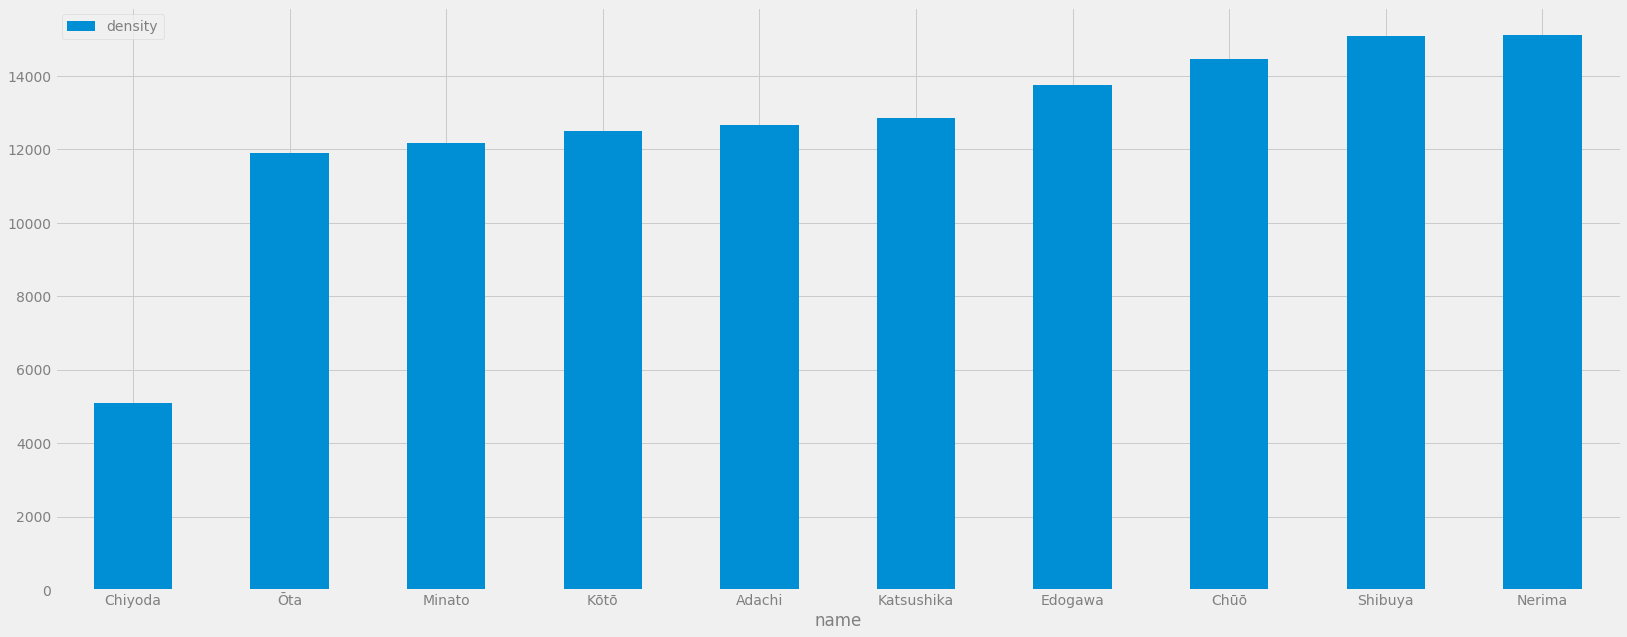

In [187]:
densitydata.head(10).plot.bar(rot=0)

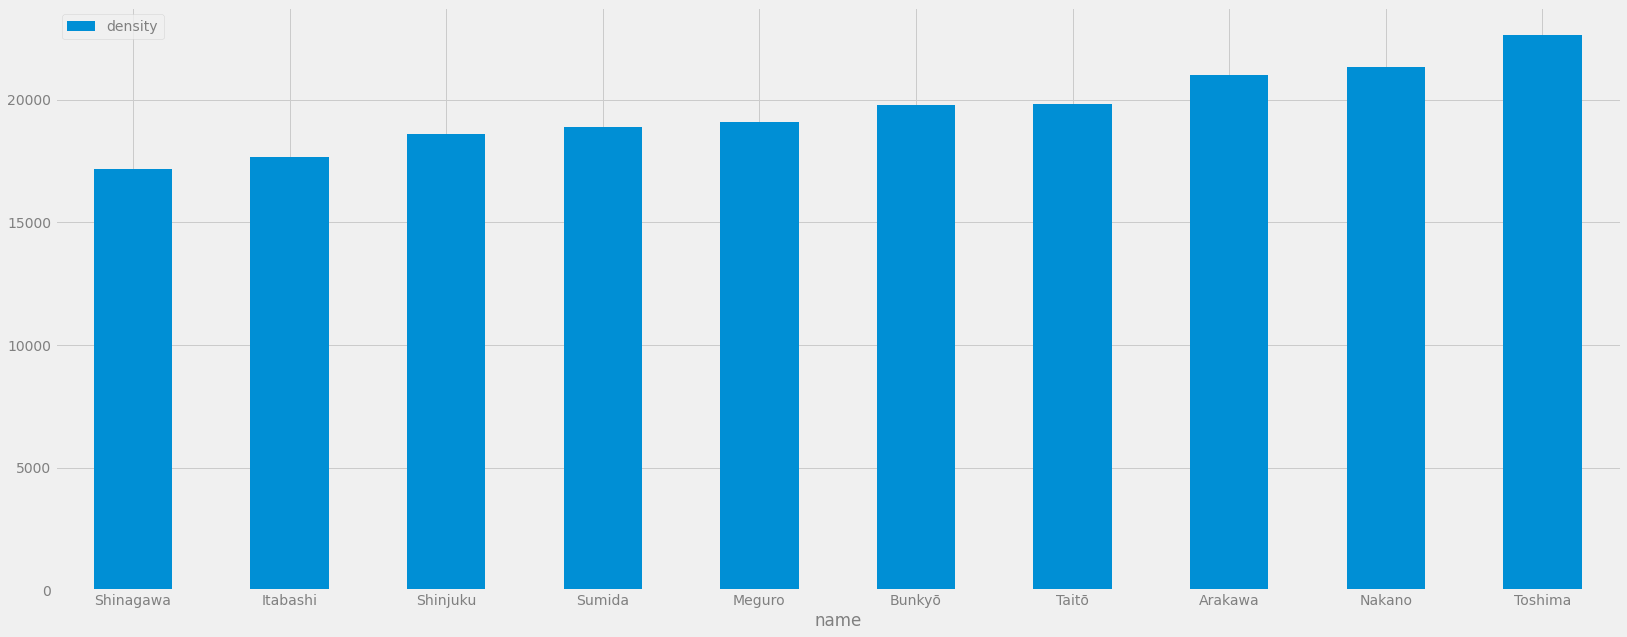

In [188]:
densitydata.tail(10).plot.bar(rot=0)

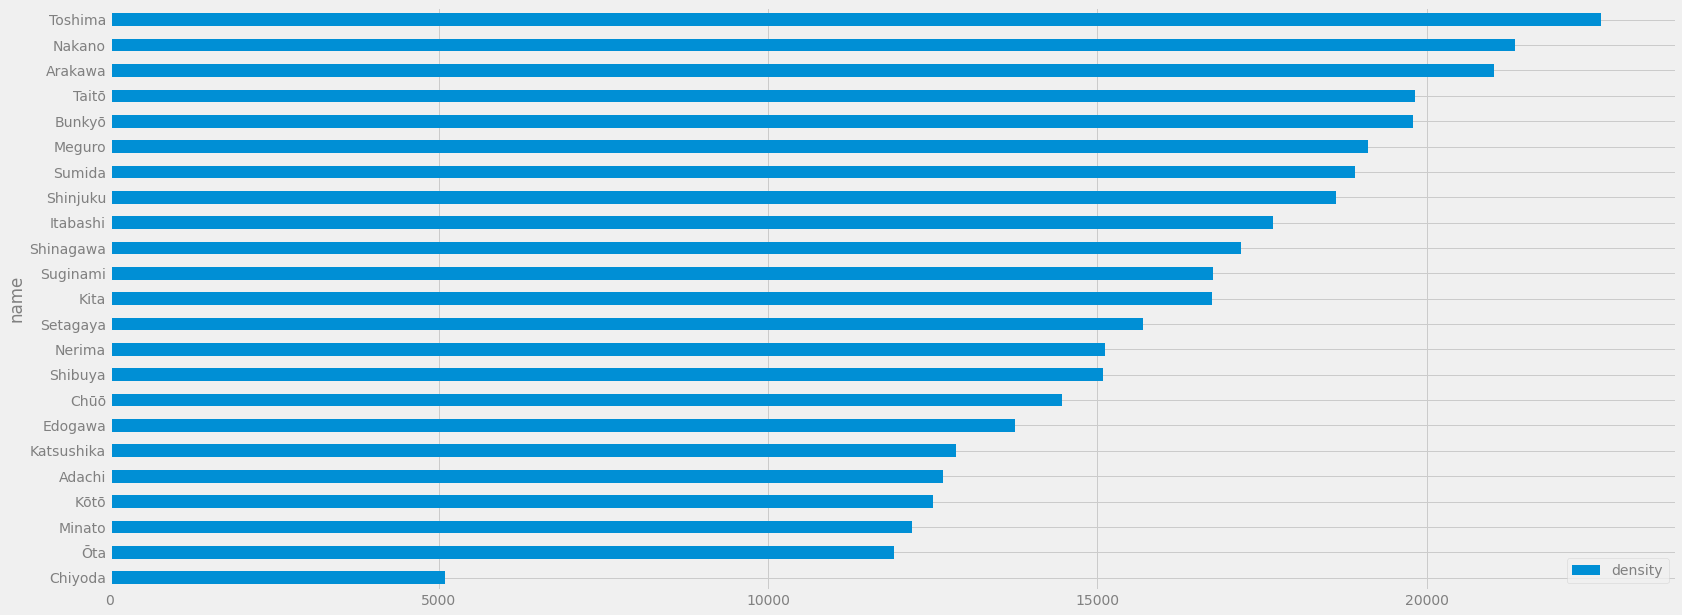

In [189]:
densitydata.plot.barh()

In [0]:
populationdata=data[['name','population']]
populationdata.set_index('name',inplace=True)

In [193]:
populationdata.sort_values('population',inplace=True)
plt.style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


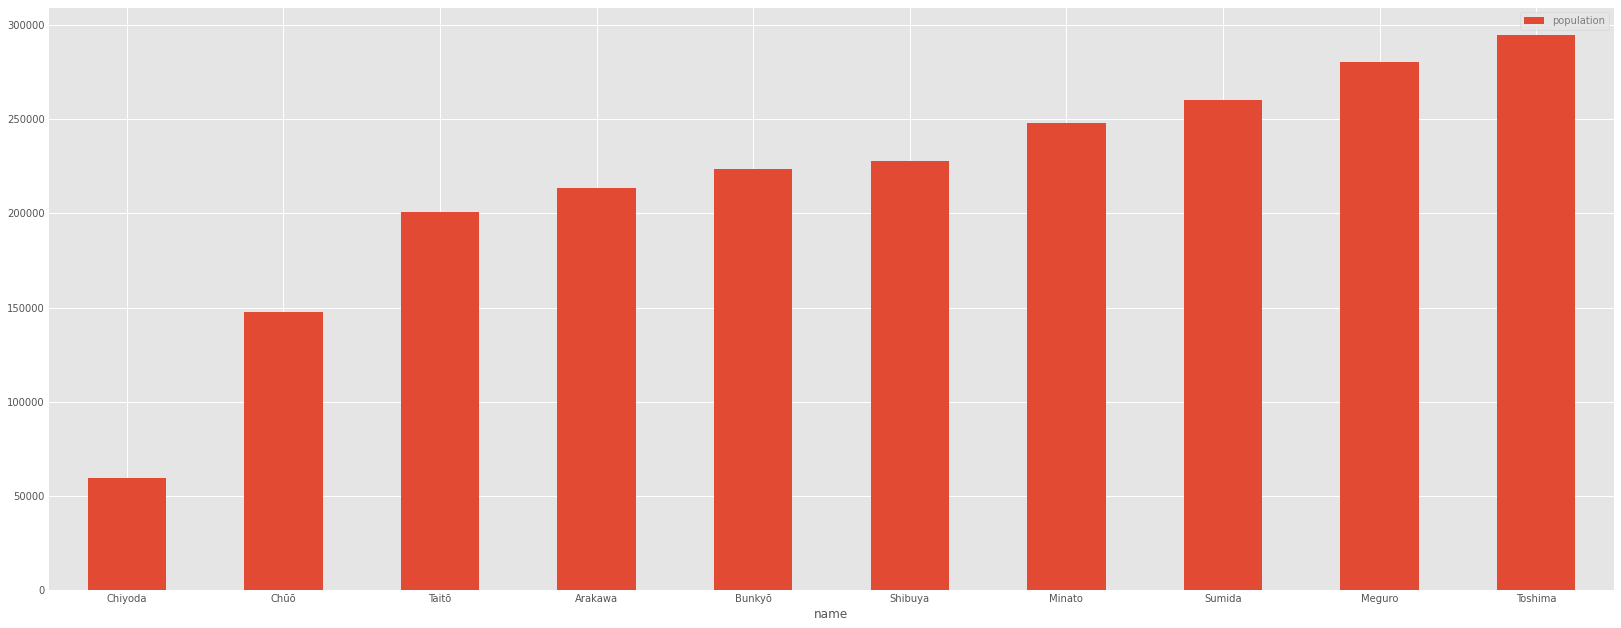

In [194]:
populationdata.head(10).plot.bar(rot=0)

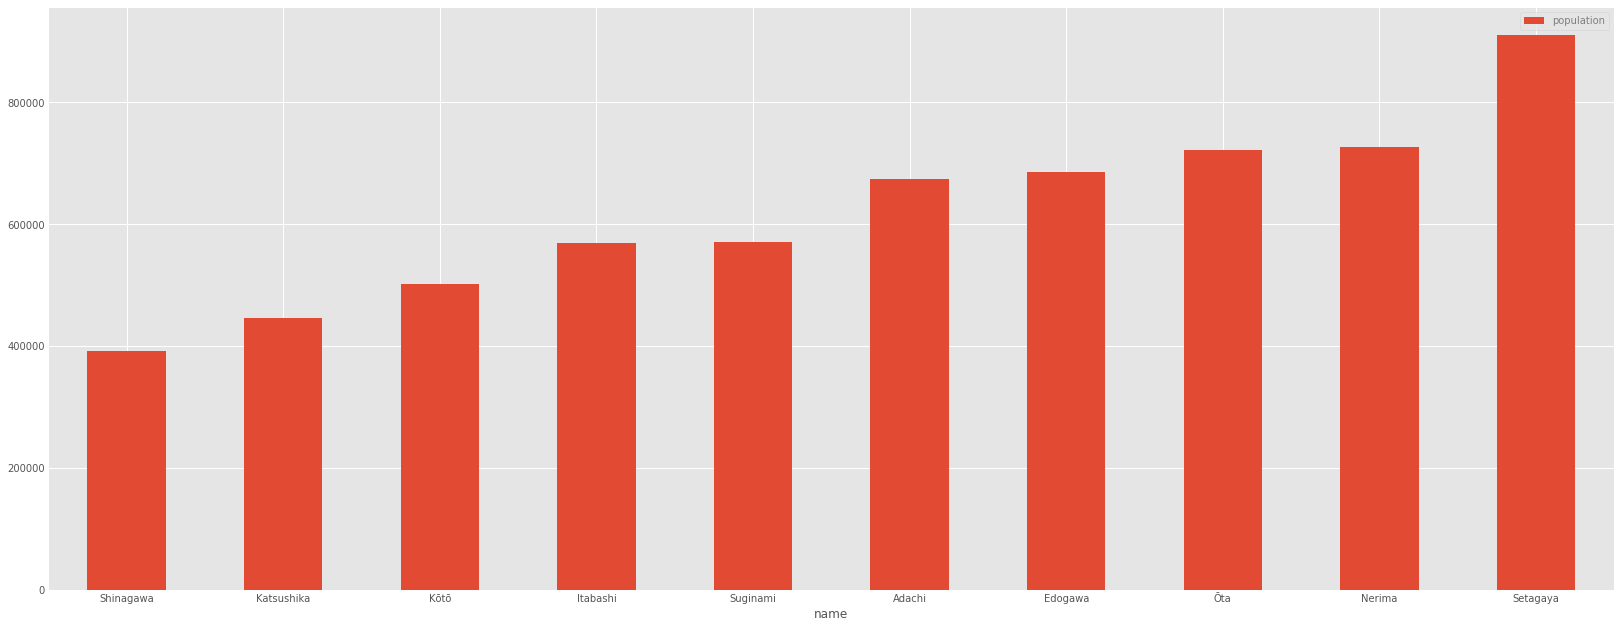

In [195]:
populationdata.tail(10).plot.bar(rot=0)

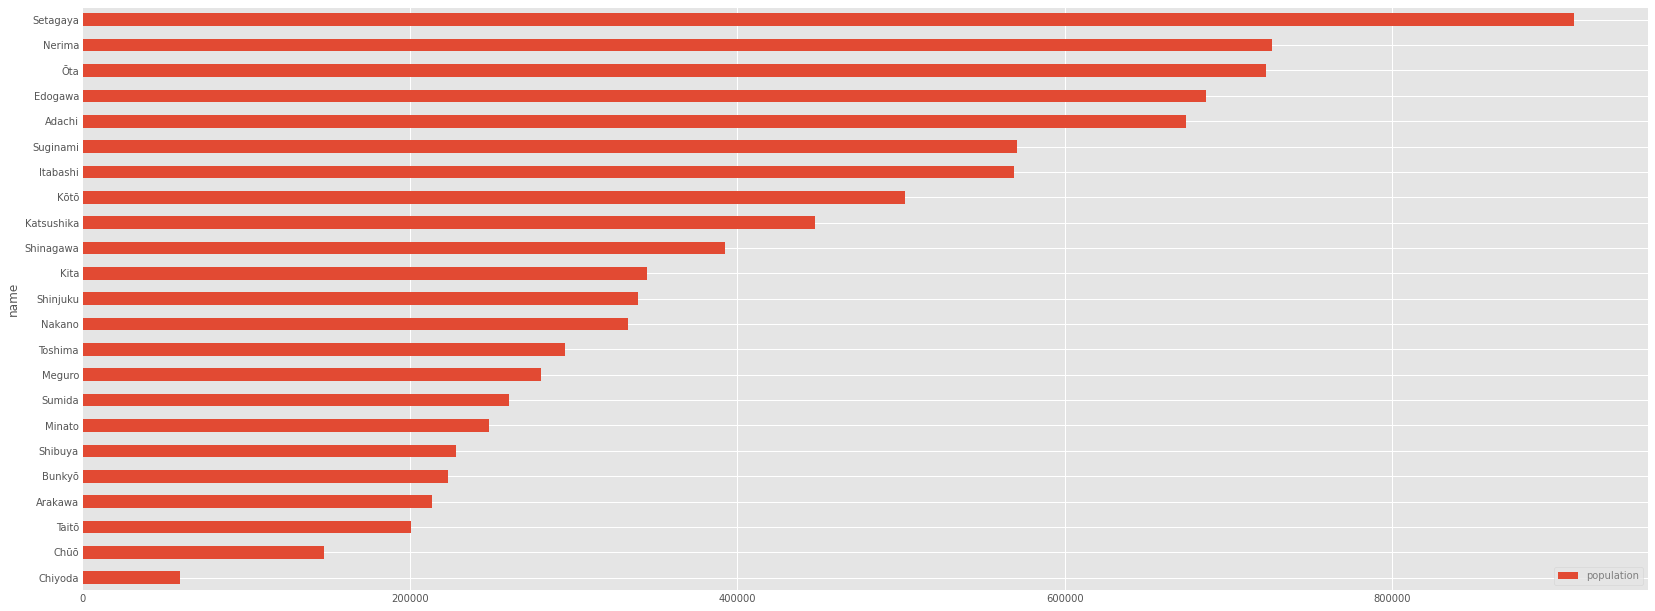

In [196]:
populationdata.plot.barh()

In [156]:
dataarea=data[['name','area','density']]
dataarea.head()

,name,area,density
0,Chiyoda,11.66,5100
1,Chūō,10.21,14460
2,Minato,20.37,12180
3,Shinjuku,18.22,18620
4,Bunkyō,11.29,19790


In [160]:
dataarea.sort_values('density',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


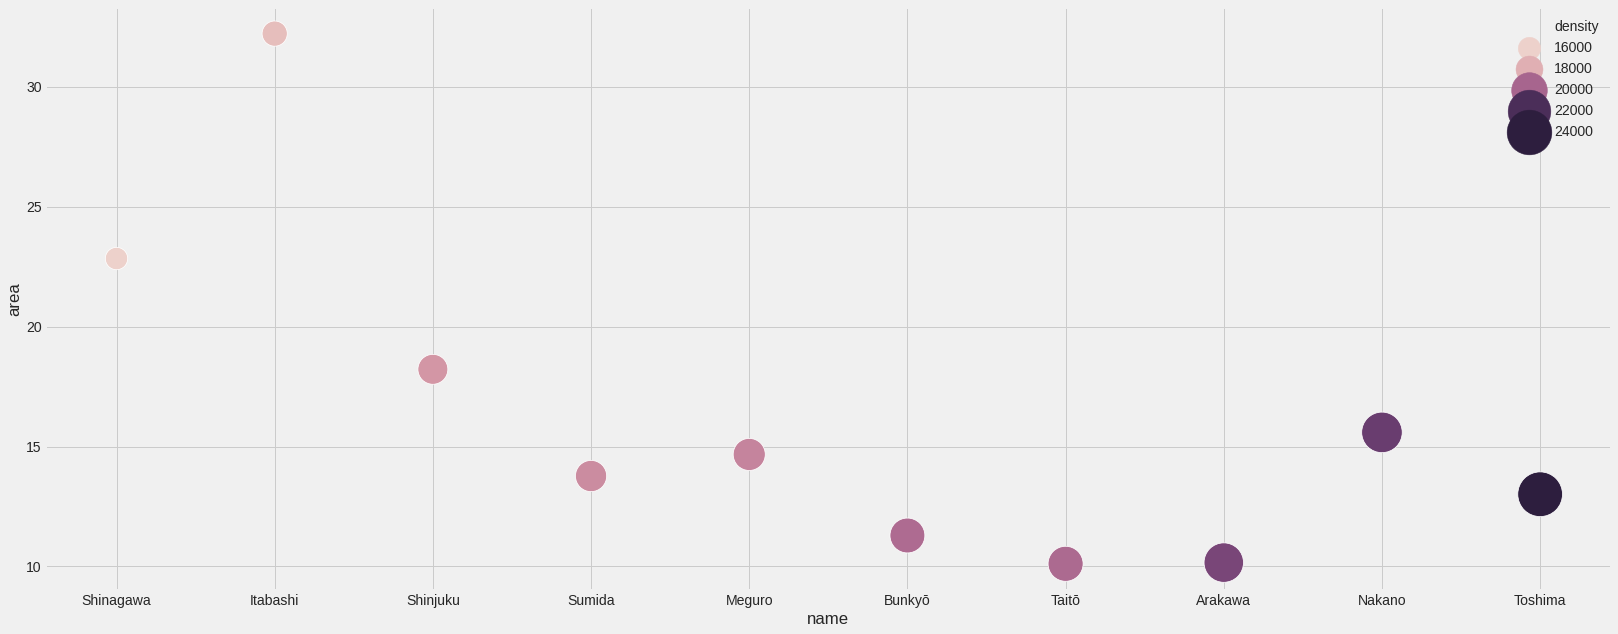

In [200]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x=dataarea.tail(10)['name'], y=dataarea.tail(10)['area'], hue=dataarea.tail(10)['density'], size=dataarea.tail(10)['density'], sizes=(500,2000))

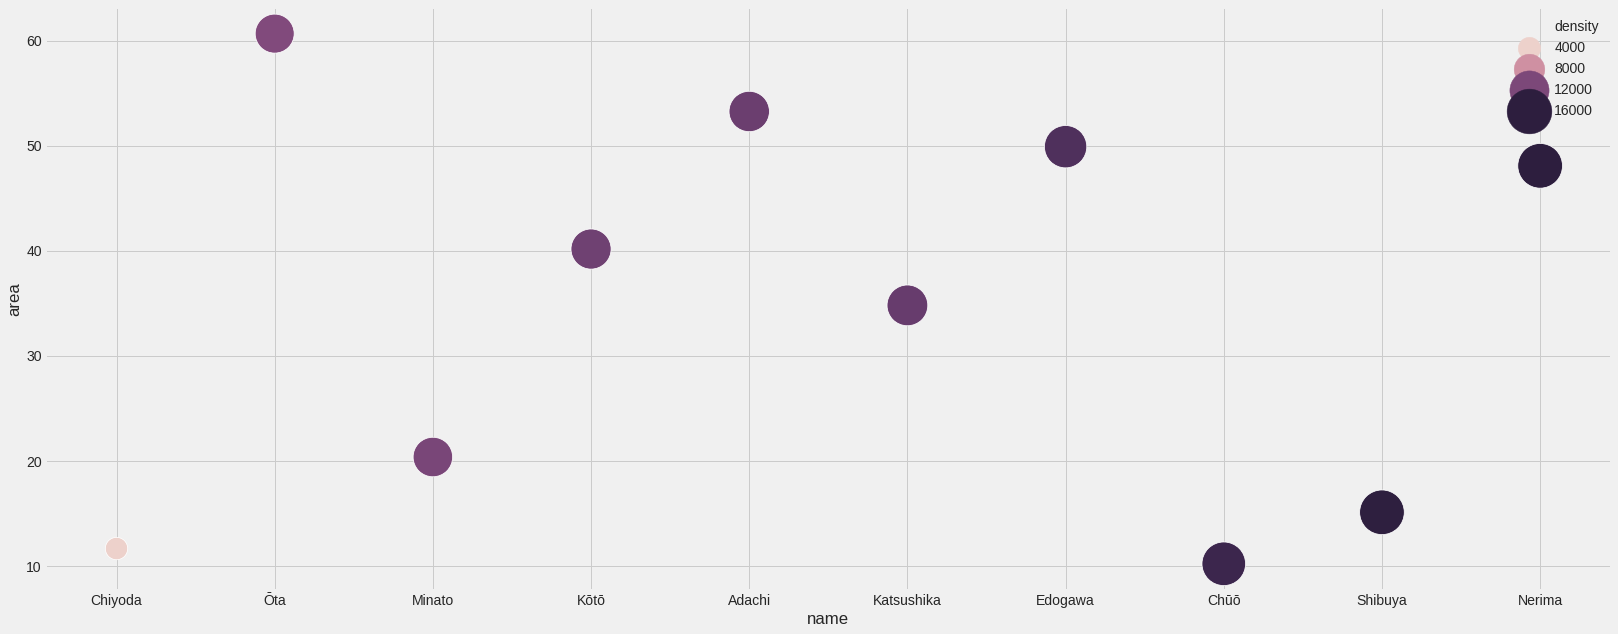

In [201]:
sns.scatterplot(x=dataarea.head(10)['name'], y=dataarea.head(10)['area'], hue=dataarea.head(10)['density'], size=dataarea.head(10)['density'], sizes=(500,2000))

Foursquared version and credentials

In [0]:
CLIENT_ID = 'A0T24AQKVWQXIFPH1IKOZQBBY0DNHMMPZVJ0RTAUFADRCUOB' # your Foursquare ID
CLIENT_SECRET = 'YMCUVQMKYLQZE3NZ5Q5B30I5SDHKYHDYJNXGMSLG1N5NJGPQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


function that extracts the category of the venue

In [0]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

cfunction to clean the json and structure it into a pandas dataframe and return nearby benues of all the neighborhoods

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Storing neighbourhood data in a new dataframe

In [39]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
tokyo_venues = getNearbyVenues(names=data['major_districts'],
                                   latitudes=data['latitude'],
                                   longitudes=data['longitude']
                                  )



Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi, Akihabara, Yūrakuchō, Iidabashi, Kanda
Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōbori, Shinkawa, Tsukishima, Kachidoki, Tsukuda
Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppongi, Toranomon, Aoyama, Azabu
Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ichigaya, Yotsuya
Hongō, Yayoi, Hakusan
Ueno, Asakusa
Kinshichō, Morishita, Ryōgoku
Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi
Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi, Tennōzu
Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
Ōmori, Kamata, Haneda, Den-en-chōfu
Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa
Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, Sendagaya, Yoyogi
Nakano
Kōenji, Asagaya, Ogikubo
Ikebukuro, Komagome, Senkawa, Sugamo
Akabane, Ōji, Tabata
Arakawa, Machiya, Nippori, Minamisenju
Itabashi, Takashimadaira
Nerima, Ōizumi, Hikarigaoka
Ayase, Kitasenju, Takenotsuka
Tateishi, Aoto, Kameari, Shibamata
Kasai, Koiwa


In [40]:
tokyo_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Shimizumon Gate (清水門),35.692685,139.752681,Historic Site
2,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Kitanomaru Park (北の丸公園),35.691653,139.751201,Park
3,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Nippon Budokan (日本武道館),35.693356,139.749865,Stadium
4,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Mori no Butchers (森のブッチャーズ),35.694770,139.755980,Gastropub


In [41]:
tokyo_venues.shape

(1092, 7)

In [42]:
tokyo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Akabane, Ōji, Tabata",100,100,100,100,100,100
"Arakawa, Machiya, Nippori, Minamisenju",35,35,35,35,35,35
"Ayase, Kitasenju, Takenotsuka",10,10,10,10,10,10
"Hongō, Yayoi, Hakusan",17,17,17,17,17,17
"Ikebukuro, Komagome, Senkawa, Sugamo",40,40,40,40,40,40
"Itabashi, Takashimadaira",23,23,23,23,23,23
"Kasai, Koiwa",18,18,18,18,18,18
"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi",30,30,30,30,30,30
"Kinshichō, Morishita, Ryōgoku",35,35,35,35,35,35


In [43]:
# one hot encoding
tokyo_onehot = pd.get_dummies(tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot['Neighborhood'] = tokyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot.head()

,Neighborhood,ATM,Accessories Store,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bridge,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Canal,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fish Market,Fishing Store,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Leather Goods Store,Library,Liquor Store,Lounge,Market,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0

In [44]:
tokyo_onehot.shape

(1092, 192)

In [0]:
tokyo_grouped = tokyo_onehot.groupby('Neighborhood').mean().reset_index()

In [46]:
tokyo_grouped

,Neighborhood,ATM,Accessories Store,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bridge,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Canal,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fish Market,Fishing Store,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Leather Goods Store,Library,Liquor Store,Lounge,Market,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rest Area,Restaurant,River,Road,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,"Akabane, Ōji, Tabata",0.010000,0.00,0.010,0.000000,0.000000,0.000000,0.000000,0.030000,0.01,0.010000,0.030000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,0.00,0.010000,0.00,0.030000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00,0.000000,0.000000,0.00,0.010000,0.010000,0.020000,0.000000,0.010000,0.000,0.01,0.000000,0.020000,0.000,0.000000,0.000000,0.010000,0.01,0.000,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.00,0.00,0.010000,0.020000,0.00,0.000000,0.000000,0.030000,0.020000,0.020000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.00,0.000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.170000,0.000000,0.000000,0.000000,0.00,0.000000,0.030000,0.00,0.000000,0.030000,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.0000

Analysis of venue data

In [47]:
num_top_venues = 3

for hood in tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tokyo_grouped[tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akabane, Ōji, Tabata----
               venue  freq
0           Sake Bar  0.17
1  Convenience Store  0.10
2   Ramen Restaurant  0.06


----Arakawa, Machiya, Nippori, Minamisenju----
               venue  freq
0  Convenience Store  0.14
1               Park  0.11
2      Grocery Store  0.09


----Ayase, Kitasenju, Takenotsuka----
                 venue  freq
0    Convenience Store   0.3
1  Japanese Restaurant   0.2
2          Supermarket   0.1


----Hongō, Yayoi, Hakusan----
                 venue  freq
0                 Park  0.12
1  Japanese Restaurant  0.12
2    Convenience Store  0.06


----Ikebukuro, Komagome, Senkawa, Sugamo----
                venue  freq
0    Ramen Restaurant  0.12
1  Chinese Restaurant  0.05
2   Convenience Store  0.05


----Itabashi, Takashimadaira----
                venue  freq
0   Convenience Store  0.17
1  Chinese Restaurant  0.09
2                Park  0.09


----Kasai, Koiwa----
               venue  freq
0  Convenience Store  0.28
1           Pharmac

function to sort the venues in descending order.

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create a new dataframe and display the top 10 venues for each neighborhood.

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tokyo_grouped['Neighborhood']

for ind in np.arange(tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Akabane, Ōji, Tabata",Sake Bar,Convenience Store,Ramen Restaurant,Bar,Shopping Mall,Italian Restaurant,Coffee Shop,Supermarket,BBQ Joint,Soba Restaurant
1,"Arakawa, Machiya, Nippori, Minamisenju",Convenience Store,Park,Grocery Store,Intersection,Noodle House,Café,Ramen Restaurant,Indian Restaurant,Theater,Donburi Restaurant
2,"Ayase, Kitasenju, Takenotsuka",Convenience Store,Japanese Restaurant,Supermarket,Restaurant,Drugstore,Park,Pharmacy,Flea Market,Gaming Cafe,Furniture / Home Store
3,"Hongō, Yayoi, Hakusan",Japanese Restaurant,Park,Intersection,Steakhouse,Road,Museum,Spa,BBQ Joint,Botanical Garden,Szechuan Restaurant
4,"Ikebukuro, Komagome, Senkawa, Sugamo",Ramen Restaurant,Music Store,Chinese Restaurant,Convenience Store,Japanese Restaurant,Yoshoku Restaurant,Hobby Shop,Sake Bar,Rock Club,Recording Studio


##Clustering the Neighborhoods

Cluster the neighborhood in 3 clusters

In [50]:
# set number of clusters
kclusters = 3
tokyo_grouped_clustering = tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 2], dtype=int32)

creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = data

# merge tokyo_grouped with tokyo_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='major_districts',how = 'right')

tokyo_merged.head() 

,name,population,density,area,major_districts,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216,2.927152,2,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Café,Convenience Store,Historic Site,Sake Bar,Japanese Curry Restaurant,Restaurant,Art Museum
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565,8.299338,2,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Coffee Shop,Convenience Store,Donburi Restaurant,Italian Restaurant,Seafood Restaurant,Bakery,Park
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,6.990728,1,Convenience Store,Soba Restaurant,Park,Discount Store,Hotel,Diner,French Restaurant,Chinese Restaurant,Café,Music Venue
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,10.686976,2,Bar,Sake Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Yakitori Restaurant,Dessert Shop,Pub,Chinese Restaurant,Department Store
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732,11.358499,1,Japanese Restaurant,Park,Intersection,Steakhouse,Road,Museum,Spa,BBQ Joint,Botanical Garden,Szechuan Restaurant


visualize the resulting clusters

In [220]:
# create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=12,tiles = "CartoDB dark_matter")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, radius in zip(tokyo_merged['latitude'], tokyo_merged['longitude'], tokyo_merged['major_districts'], tokyo_merged['Cluster Labels'],tokyo_merged['radius']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)

    cls=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=radius,
        popup=label,
        color=rainbow[cls-1],
        fill=True,
        fill_color=rainbow[cls-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##Examining the Clusters

Function to get cluster data

In [0]:
def get_cluster(i):
  return tokyo_merged.loc[tokyo_merged['Cluster Labels'] == i-1, tokyo_merged.columns[[0,1,2,4] + list(range(9, tokyo_merged.shape[1]))]]

In [54]:
cluster1=get_cluster(1)
cluster1

,name,population,density,major_districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Adachi,674067,12660,"Ayase, Kitasenju, Takenotsuka",Convenience Store,Japanese Restaurant,Supermarket,Restaurant,Drugstore,Park,Pharmacy,Flea Market,Gaming Cafe,Furniture / Home Store
22,Edogawa,685899,13750,"Kasai, Koiwa",Convenience Store,Pharmacy,Deli / Bodega,Pet Store,Clothing Store,Bath House,Grocery Store,River,Indian Restaurant,Supermarket


In [55]:
cluster2=get_cluster(2)
cluster2

,name,population,density,major_districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Minato,248071,12180,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",Convenience Store,Soba Restaurant,Park,Discount Store,Hotel,Diner,French Restaurant,Chinese Restaurant,Café,Music Venue
4,Bunkyō,223389,19790,"Hongō, Yayoi, Hakusan",Japanese Restaurant,Park,Intersection,Steakhouse,Road,Museum,Spa,BBQ Joint,Botanical Garden,Szechuan Restaurant
6,Sumida,260358,18910,"Kinshichō, Morishita, Ryōgoku",Convenience Store,Japanese Restaurant,Bus Stop,Café,Intersection,Chinese Restaurant,Tonkatsu Restaurant,Gourmet Shop,Grocery Store,Coffee Shop
7,Kōtō,502579,12510,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",Intersection,Convenience Store,Bus Stop,Park,Metro Station,Market,Dog Run,Rugby Pitch,Plaza,Platform
8,Shinagawa,392492,17180,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",Convenience Store,BBQ Joint,Bus Stop,Park,Canal,Grocery Store,Train Station,Donburi Restaurant,Sushi Restaurant,Flea Market
9,Meguro,280283,19110,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",Convenience Store,Chinese Restaurant,Bus Stop,Grocery Store,Japanese Restaurant,Noodle House,Sushi Restaurant,Coffee Shop,Shopping Mall,Photography Studio
11,Setagaya,910868,15690,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",Convenience Store,Café,Tram Station,Ramen Restaurant,Bakery,Tea Room,Bistro,Concert Hall,Szechuan Restaurant,Cupcake Shop
17,Arakawa,213648,21030,"Arakawa, Machiya, Nippori, Minamisenju",Convenience Store,Park,Grocery Store,Intersection,Noodle House,Café,Ramen Restaurant,Indian Restaurant,Theater,Donburi Restaurant
18,Itabashi,569225,17670,"Itabashi, Takashimadaira",Convenience Store,Park,Chinese Restaurant,Intersection,Rest Area,Hobby Shop,Bus Stop,Bus Station,Supermarket,Grocery Store
19,Nerima,726748,15120,"Nerima, Ōizumi, Hikarigaoka",Convenience Store,Café,Chinese Restaurant,Intersection,Bakery,Supermarket,Pharmacy,Bike Rental / Bike Share,Metro Station,Bus Stop


In [56]:
cluster3=get_cluster(3)
cluster3

,name,population,density,major_districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,59441,5100,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",Ramen Restaurant,Chinese Restaurant,Coffee Shop,Café,Convenience Store,Historic Site,Sake Bar,Japanese Curry Restaurant,Restaurant,Art Museum
1,Chūō,147620,14460,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Coffee Shop,Convenience Store,Donburi Restaurant,Italian Restaurant,Seafood Restaurant,Bakery,Park
3,Shinjuku,339211,18620,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",Bar,Sake Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Yakitori Restaurant,Dessert Shop,Pub,Chinese Restaurant,Department Store
5,Taitō,200486,19830,"Ueno, Asakusa",Coffee Shop,Hotel,Hostel,BBQ Joint,Japanese Restaurant,Convenience Store,Ramen Restaurant,Sushi Restaurant,Wagashi Place,Café
10,Ōta,722608,11910,"Ōmori, Kamata, Haneda, Den-en-chōfu",Ramen Restaurant,Sake Bar,Japanese Restaurant,Chinese Restaurant,Café,Dumpling Restaurant,Italian Restaurant,Bed & Breakfast,Tonkatsu Restaurant,Convenience Store
12,Shibuya,227850,15080,"Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, S...",Café,Record Shop,BBQ Joint,Rock Club,Nightclub,Ramen Restaurant,Concert Hall,Japanese Restaurant,Chinese Restaurant,Clothing Store
13,Nakano,332902,21350,Nakano,Ramen Restaurant,Convenience Store,Grocery Store,Park,Sake Bar,Café,Discount Store,Bookstore,Jazz Club,Noodle House
14,Suginami,570483,16750,"Kōenji, Asagaya, Ogikubo",Sake Bar,Shopping Mall,Café,Italian Restaurant,Ramen Restaurant,Grocery Store,Indie Theater,Tea Room,Liquor Store,Gym / Fitness Center
15,Toshima,294673,22650,"Ikebukuro, Komagome, Senkawa, Sugamo",Ramen Restaurant,Music Store,Chinese Restaurant,Convenience Store,Japanese Restaurant,Yoshoku Restaurant,Hobby Shop,Sake Bar,Rock Club,Recording Studio
16,Kita,345063,16740,"Akabane, Ōji, Tabata",Sake Bar,Convenience Store,Ramen Restaurant,Bar,Shopping Mall,Italian Restaurant,Coffee Shop,Supermarket,BBQ Joint,Soba Restaurant


Function to get the number of food industries and number of people per food industry

In [0]:
def no_of_restaurants(clusterx):
  number=0
  clusterx.index=np.arange(clusterx.shape[0]).tolist()
  clusterx.columns=np.arange(clusterx.shape[1]).tolist()
  
  for i in range(clusterx.shape[0]):  
    for j in range(3,clusterx.shape[1]):  
      split=clusterx.loc[i,j].split(' ')
      if ('Restaurant' in split) or ('Sake' in split) or ('Coffee' in split) or ('Bakery' in split) or ('Diner' in split):
        number+=1
  rpp=clusterx[1].sum()
  return number,rpp



In [0]:
r1,rpp1=no_of_restaurants(cluster1)
r2,rpp2=no_of_restaurants(cluster2)
r3,rpp3=no_of_restaurants(cluster3)

###Plotting the result

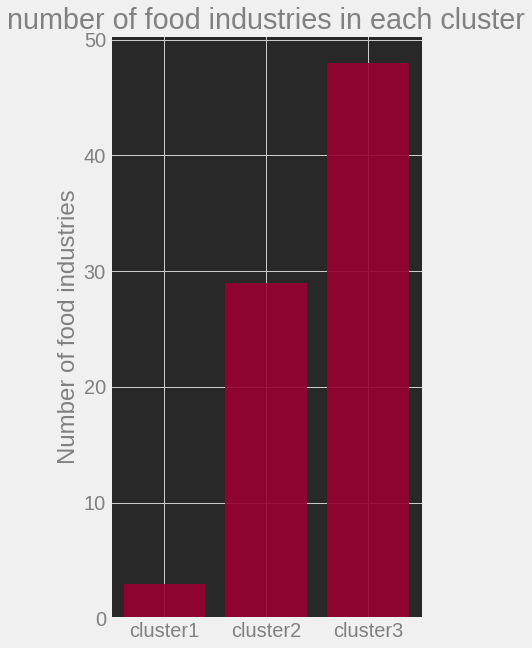

In [216]:
plt.rcParams['axes.facecolor'] = '#282828'
plt.rcParams['text.color'] = 'grey'
plt.rcParams['font.size'] = 20
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['figure.figsize'] = 5, 10
objects = ('cluster1','cluster2','cluster3')
y_pos = np.arange(len(objects))
numbers = [r1,r2,r3]

plt.bar(y_pos, numbers, align='center', alpha=0.9,color='#990033',)
plt.xticks(y_pos, objects)
plt.ylabel('Number of food industries')
plt.title('number of food industries in each cluster')

plt.show()

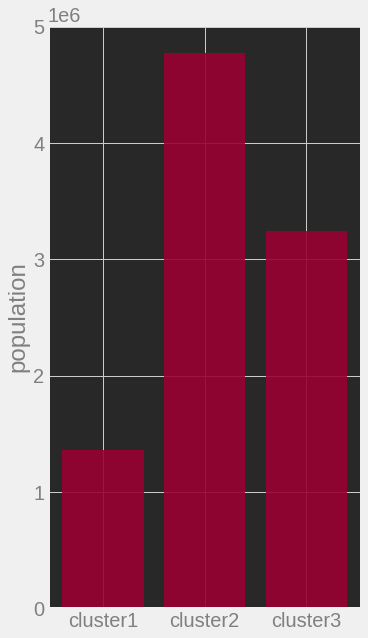

In [219]:
plt.rcParams['axes.facecolor'] = '#282828'
plt.rcParams['text.color'] = 'grey'
plt.rcParams['font.size'] = 20
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['figure.figsize'] = 5, 10
objects = ('cluster1','cluster2','cluster3')
y_pos = np.arange(len(objects))
numbers = [rpp1,rpp2,rpp3]

plt.bar(y_pos, numbers, align='center', alpha=0.9,color='#990033',)
plt.xticks(y_pos, objects)
plt.ylabel('population')


plt.show()

In [0]:
#4d4b7105d754a06374d81259
def getNearbyrestaurants(category,names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    v=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_rest = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_rest.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_rest)

In [64]:
cat_rest="4d4b7105d754a06374d81259"

restaurants_data=getNearbyrestaurants(cat_rest,names=data['major_districts'],
                                   latitudes=data['latitude'],
                                   longitudes=data['longitude']
                                  )


Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi, Akihabara, Yūrakuchō, Iidabashi, Kanda
Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōbori, Shinkawa, Tsukishima, Kachidoki, Tsukuda
Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppongi, Toranomon, Aoyama, Azabu
Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ichigaya, Yotsuya
Hongō, Yayoi, Hakusan
Ueno, Asakusa
Kinshichō, Morishita, Ryōgoku
Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi
Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi, Tennōzu
Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
Ōmori, Kamata, Haneda, Den-en-chōfu
Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa
Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, Sendagaya, Yoyogi
Nakano
Kōenji, Asagaya, Ogikubo
Ikebukuro, Komagome, Senkawa, Sugamo
Akabane, Ōji, Tabata
Arakawa, Machiya, Nippori, Minamisenju
Itabashi, Takashimadaira
Nerima, Ōizumi, Hikarigaoka
Ayase, Kitasenju, Takenotsuka
Tateishi, Aoto, Kameari, Shibamata
Kasai, Koiwa


In [65]:
restaurants_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
1,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Rice Curry Manten (ライスカレーまんてん),35.698213,139.757428,Japanese Curry Restaurant
2,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Jimbocho Shokuniku Center (神保町食肉センター),35.697206,139.757284,BBQ Joint
3,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Saboru (さぼうる),35.695552,139.758648,Café
4,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Maruka (丸香),35.696693,139.760121,Udon Restaurant


In [66]:
restaurants_data.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [67]:
restaurants_data.shape

(2300, 7)

In [0]:

coord=restaurants_data[['Venue Latitude', 'Venue Longitude']].values.tolist()


In [0]:
location = geolocator.geocode("tokyo")

In [75]:
from folium.plugins import HeatMap
map_rest = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)
folium.TileLayer('cartodb positron').add_to(map_rest)
HeatMap(coord,min_opacity=0.5, max_val=0.7,radius=15).add_to(map_rest)
map_rest

In [0]:
map_tokyo.save('tokyo.PNG')